# Coronary Heart Disease

![CHD](heart.jpg)

## `Introduction`
World Health Organization has estimated 12 million deaths occur worldwide, every year due to Heart diseases. Half the deaths in the United States and other developed countries are due to cardio vascular diseases. The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients and in turn reduce the complications. This research intends to pinpoint the most relevant/risk factors of heart disease as well as predict the overall risk using logistic regression, Random Forests, K Neighbors Classifier, Gradient Boosting Classifier, DecisionTreeClassifier, Support Vector Classifier and Naive Bayes Classifier.

## `Source`
The dataset is publically available on the Kaggle website, and it is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. `The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).` The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.
Variables
Each attribute is a potential risk factor. There are both demographic, behavioral and medical risk factors.

## `Demographic:`
    
• Sex: male or female(Nominal)
    
• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
Behavioral

• Current Smoker: whether or not the patient is a current smoker (Nominal)
    
• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

    Medical( history)

• BP Meds: whether or not the patient was on blood pressure medication (Nominal)
    
• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
    
• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
    
• Diabetes: whether or not the patient had diabetes (Nominal)
    

    Medical(current)
    
• Tot Chol: total cholesterol level (Continuous)
    
• Sys BP: systolic blood pressure (Continuous)
    
• Dia BP: diastolic blood pressure (Continuous)
    
• BMI: Body Mass Index (Continuous)
    
• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
    
• Glucose: glucose level (Continuous)
    
Predict variable (desired target)

• 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)

In [1]:
# Data Loading and Numerical Operations
import pandas as pd
import numpy as np
# Data Visualizations
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Data Scaling
from sklearn.preprocessing import MinMaxScaler
# Data Splitting
from sklearn.model_selection import train_test_split
# Data Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc, classification_report
# Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

In [2]:
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)


### 1. Visualization with Pandas

In [3]:
df = pd.read_csv(r'input\framingham.csv', header='infer')

In [4]:
df.shape #  print the number of rows and columns of my DataFrame

(4238, 16)

In [5]:
df.head(5) # The head() function is used to get the first n rows.

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [6]:
df.tail(5) # The tail() function is used to get the last n rows.

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0


### Checking Statistical Measure:

In [7]:
df.describe() #The describe() method returns description of the data in the DataFrame

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


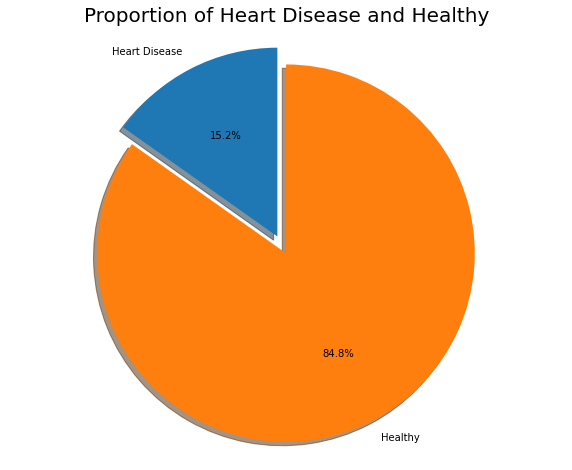

In [8]:
# here I have used matplotlib as visualization to get the outline of my data
labels = 'Heart Disease', 'Healthy' # I have given the labels as peoples with heart disease and healthy ones
sizes = [df.TenYearCHD[df["TenYearCHD"]==1].count(), df.TenYearCHD[df["TenYearCHD"]==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of Heart Disease and Healthy", size = 20)
plt.show()

### Data Preprocessing

In [9]:
df.isnull().sum().sort_values(ascending=False) # df.isnull().sum() prints the column with missing value. 
                                            
                                               # output gives glucose with the highest null values

glucose            388
education          105
BPMeds              53
totChol             50
cigsPerDay          29
BMI                 19
heartRate            1
male                 0
age                  0
currentSmoker        0
prevalentStroke      0
prevalentHyp         0
diabetes             0
sysBP                0
diaBP                0
TenYearCHD           0
dtype: int64

<AxesSubplot:>

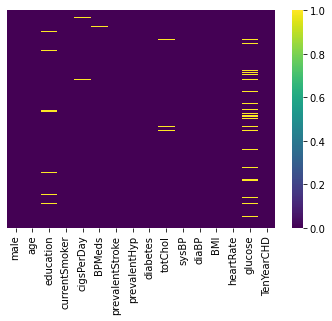

In [10]:
# plot heatmap
sns.heatmap (df.isnull(), yticklabels =False, cmap='viridis')

In [11]:
df.duplicated().sum()

0

#### Filling the missing spaces of glucosecolumn with the mean of the data (Mean = 81) present to reduce the number of missing data in our dataset

In [12]:
print((df["glucose"].mean()))

81.96675324675324


In [13]:
df["glucose"].fillna((df["glucose"].mean()), inplace=True)

In [14]:
df.dropna(inplace=True)
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

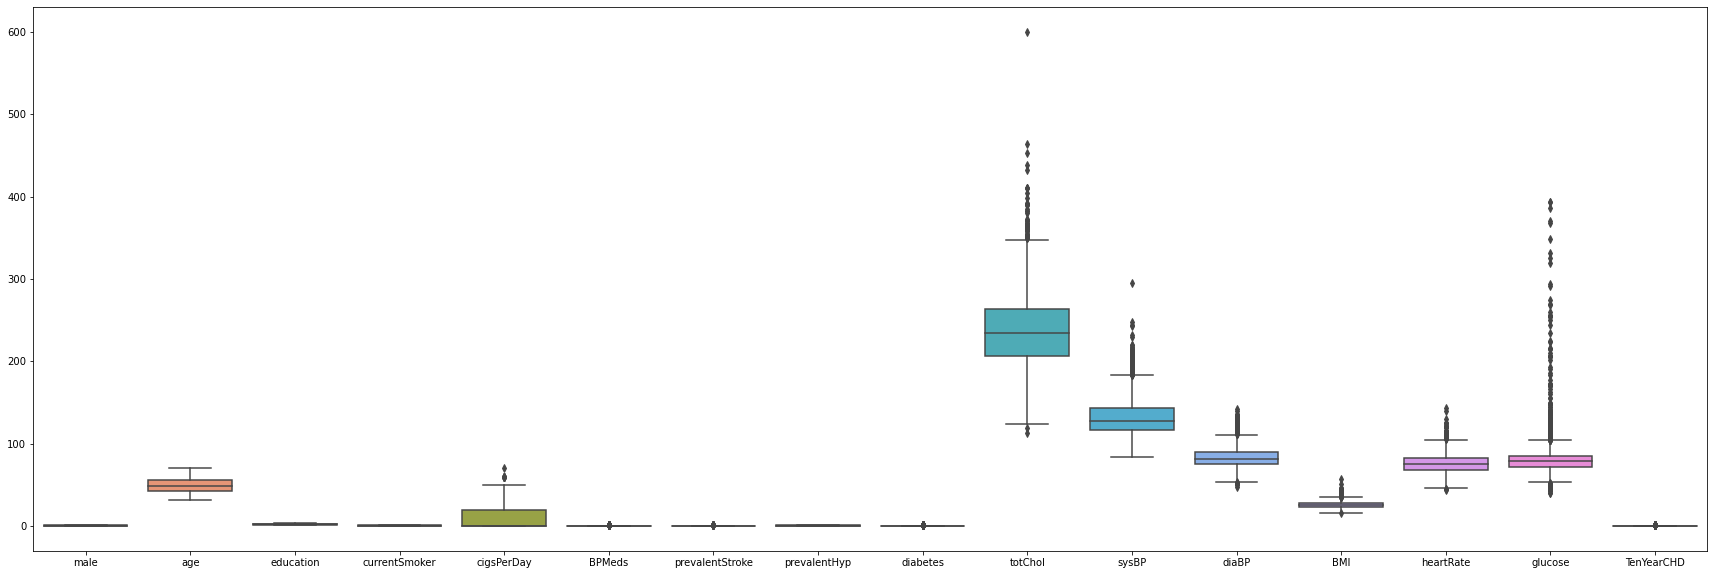

In [15]:
plt.figure(figsize=(30,10), facecolor='w')
sns.boxplot(data=df)
plt.show()

#### Removable Outliers are detected in totChol and sysBP columns of our dataset. Outliers in all other numerical columns are important and thus cannot be removed. The Outlier present in totChol is 600. The Outlier present in sysBP is 295.

#### Shape of my data before removing Outliers

In [16]:
df.shape

(3987, 16)

#### Removing Outliers

In [17]:
from scipy import stats
df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

#### Shape of my data after removing Outliers

In [18]:
df.shape

(3624, 16)

#### Visualize after removing Outliers

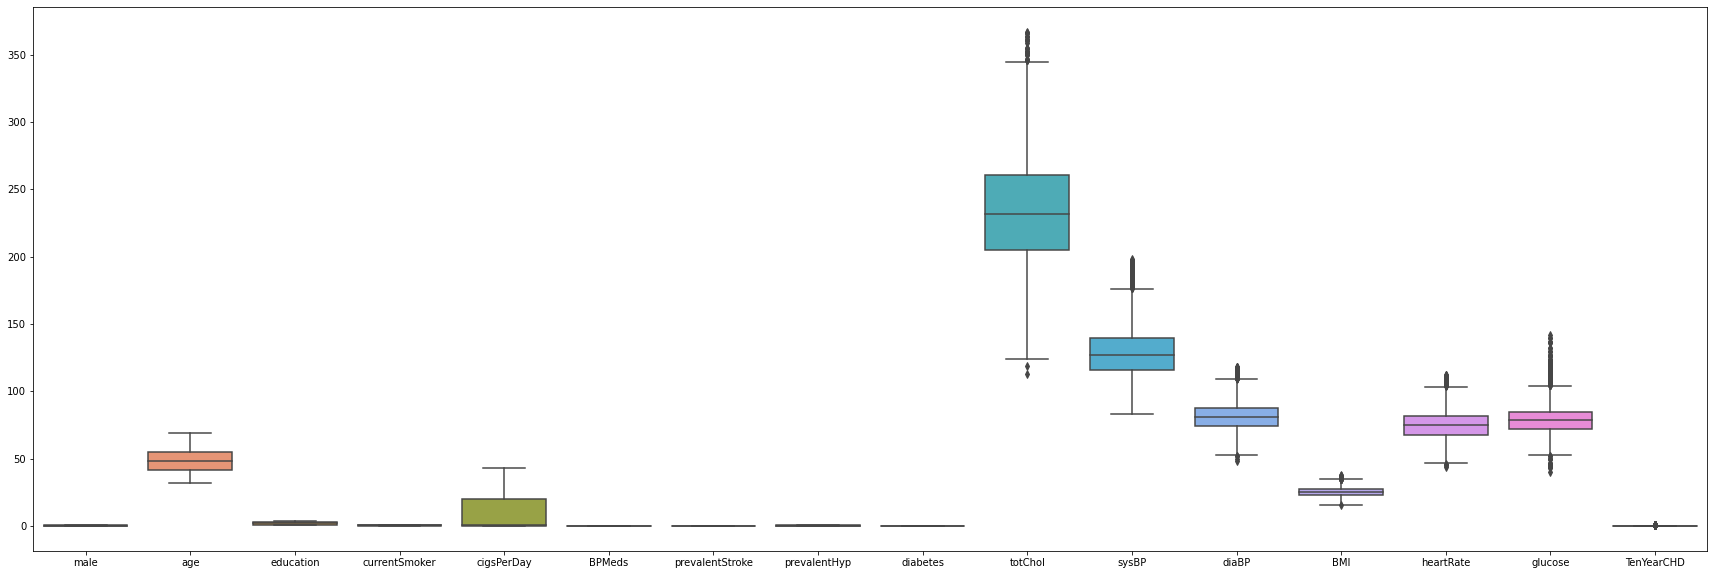

In [19]:
plt.figure(figsize=(30,10), facecolor='w')
sns.boxplot(data=df)
plt.show()

#### Checking my statistical measure again.

In [20]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3624.000000,3624.000000,3624.000000,3624.000000,3624.000000,3624.0,3624.0,3624.000000,3624.0,3624.000000,3624.000000,3624.000000,3624.000000,3624.000000,3624.000000,3624.000000
mean,0.438190,49.003311,2.000276,0.500828,9.061258,0.0,0.0,0.266280,0.0,234.696192,129.656871,81.731650,25.444078,75.368102,79.502932,0.132174
std,0.496233,8.425052,1.022922,0.500068,11.596210,0.0,0.0,0.442074,0.0,41.677344,18.981848,10.714146,3.596529,11.483754,12.187337,0.338727
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,205.000000,116.000000,74.000000,22.917500,68.000000,72.000000,0.000000
50%,0.000000,48.000000,2.000000,1.000000,1.000000,0.0,0.0,0.000000,0.0,232.000000,127.000000,81.000000,25.180000,75.000000,79.000000,0.000000
75%,1.000000,55.000000,3.000000,1.000000,20.000000,0.0,0.0,1.000000,0.0,261.000000,140.000000,88.000000,27.730000,82.000000,85.000000,0.000000
max,1.000000,69.000000,4.000000,1.000000,43.000000,0.0,0.0,1.000000,0.0,367.000000,198.000000,118.000000,37.580000,112.000000,142.000000,1.000000


In [21]:
#Checking relationship between variables
cor=df.corr()
cor

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.007411,0.003024,0.197637,0.322363,NaN,NaN,0.037931,NaN,-0.055126,-0.000677,0.091325,0.141415,-0.118790,-0.011270,0.097059
age,-0.007411,1.000000,-0.148573,-0.202306,-0.184304,NaN,NaN,0.272184,NaN,0.276361,0.367372,0.178972,0.121277,-0.024310,0.085193,0.214175
education,0.003024,-0.148573,1.000000,0.013219,0.003489,NaN,NaN,-0.072186,NaN,-0.018424,-0.116843,-0.053271,-0.122496,-0.058562,-0.013517,-0.043918
currentSmoker,0.197637,-0.202306,0.013219,1.000000,0.780213,NaN,NaN,-0.084026,NaN,-0.052770,-0.116929,-0.101484,-0.165712,0.061036,-0.051503,0.036017
cigsPerDay,0.322363,-0.184304,0.003489,0.780213,1.000000,NaN,NaN,-0.042434,NaN,-0.035702,-0.065154,-0.035578,-0.084639,0.075803,-0.064506,0.077483
BPMeds,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prevalentStroke,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prevalentHyp,0.037931,0.272184,-0.072186,-0.084026,-0.042434,NaN,NaN,1.000000,NaN,0.146531,0.682674,0.597342,0.260226,0.138303,0.077406,0.144607
diabetes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
totChol,-0.055126,0.276361,-0.018424,-0.052770,-0.035702,NaN,NaN,0.146531,NaN,1.000000,0.215619,0.186547,0.149496,0.084077,0.034226,0.060874


In [22]:
df.isnull().sum().sort_values(ascending=False)

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

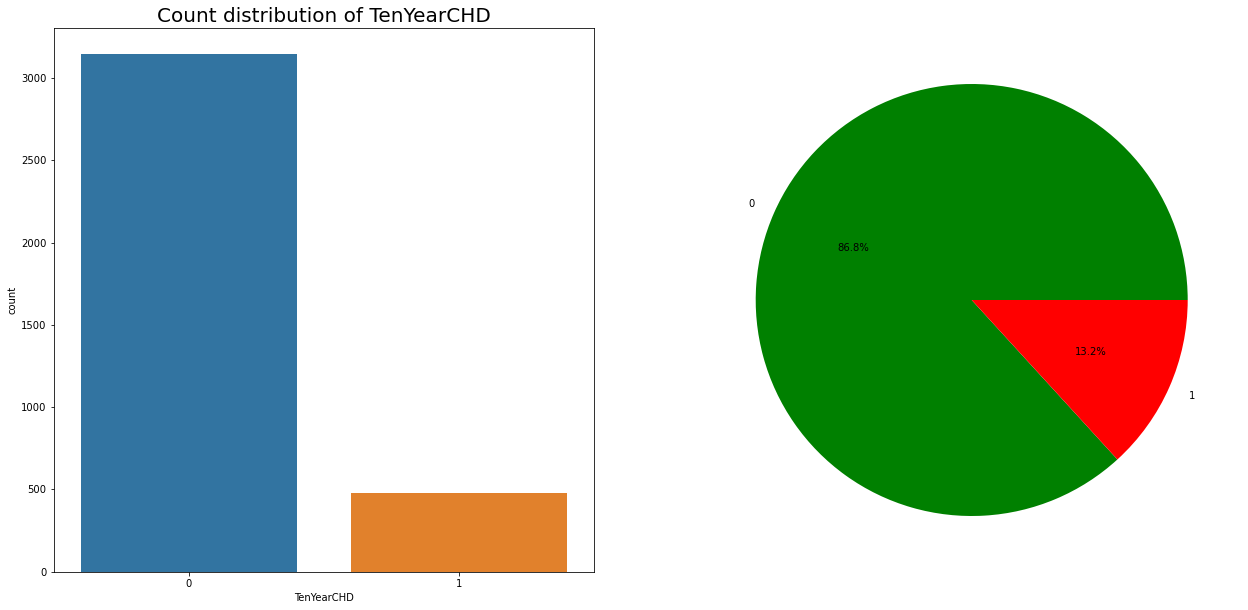

In [23]:
#Distribution of outcome variable, Heart Disease
plt.figure(figsize=(12, 10), facecolor='w')
plt.subplots_adjust(right=1.5)
plt.subplot(121)
sns.countplot(x="TenYearCHD", data=df)
plt.title("Count distribution of TenYearCHD", size=20)
plt.subplot(122)
labels=[0,1]
plt.pie(df["TenYearCHD"].value_counts(),autopct="%1.1f%%",labels=labels,colors=["green","red"])
plt.show()

#### The distribution is highly imbalanced as the number of negative cases outweigh the number of positive cases which would lead to class imbalance problem while fitting our models

(array([  0.,  50., 100., 150., 200., 250., 300.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

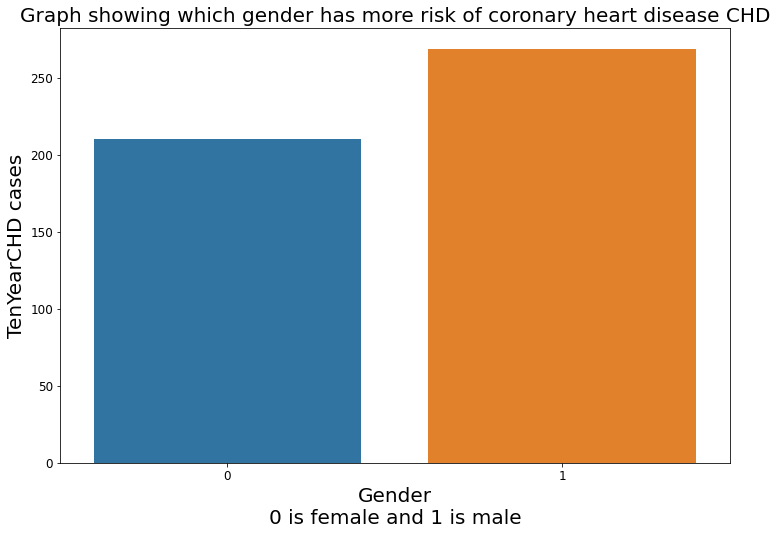

In [24]:
#Bivariate ananlysis
#checking for which gender has more risk of coronary heart disease CHD

graph_2 = df.groupby("male", as_index=False).TenYearCHD.sum()
#Ploting the above values

plt.figure(figsize=(12,8), facecolor='w')
sns.barplot(x=graph_2["male"], y=graph_2["TenYearCHD"])
plt.title("Graph showing which gender has more risk of coronary heart disease CHD", size=20)
plt.xlabel("Gender\n0 is female and 1 is male",size=20)
plt.ylabel("TenYearCHD cases", size=20)
plt.xticks(size=12)
plt.yticks(size=12)

In [25]:
data = df

(array([-50.,   0.,  50., 100., 150., 200., 250., 300.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

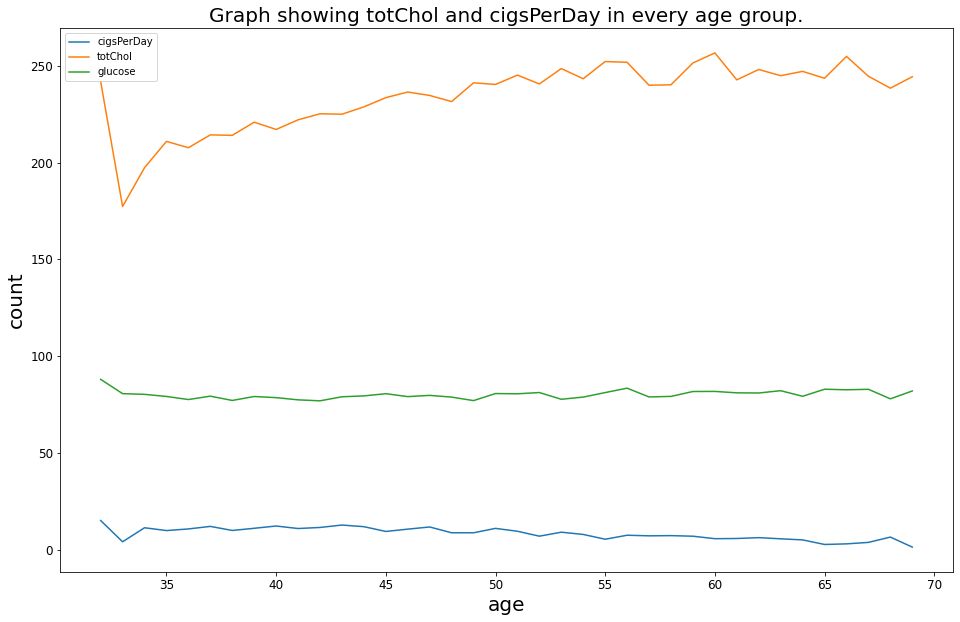

In [26]:
# Multivariate analysis

#Plotting a linegraph to check the relationship between age and cigsPerDay, totChol, glucose.

graph_5 = data.groupby("age").cigsPerDay.mean()
graph_6 = data.groupby("age").totChol.mean()
graph_7 = data.groupby("age").glucose.mean()

plt.figure(figsize=(16,10), facecolor='w')
sns.lineplot(data=graph_5, label="cigsPerDay")
sns.lineplot(data=graph_6, label="totChol")
sns.lineplot(data=graph_7, label="glucose")
plt.title("Graph showing totChol and cigsPerDay in every age group.", size=20)
plt.xlabel("age", size=20)
plt.ylabel("count", size=20)
plt.xticks(size=12)
plt.yticks(size=12)

#### Filling up dataset with new rows with TenYearCHD = 1 to make dataset balanced

In [27]:
# Data Resampling
from sklearn.utils import resample

In [28]:
# Resampling
target1=df[df['TenYearCHD']==1]
target0=df[df['TenYearCHD']==0]

In [29]:
target1=resample(target1,replace=True,n_samples=len(target0),random_state=40)
target=pd.concat([target0,target1])
df=target
np.shape(df)

(6290, 16)

In [30]:
target['TenYearCHD'].value_counts() 

0    3145
1    3145
Name: TenYearCHD, dtype: int64

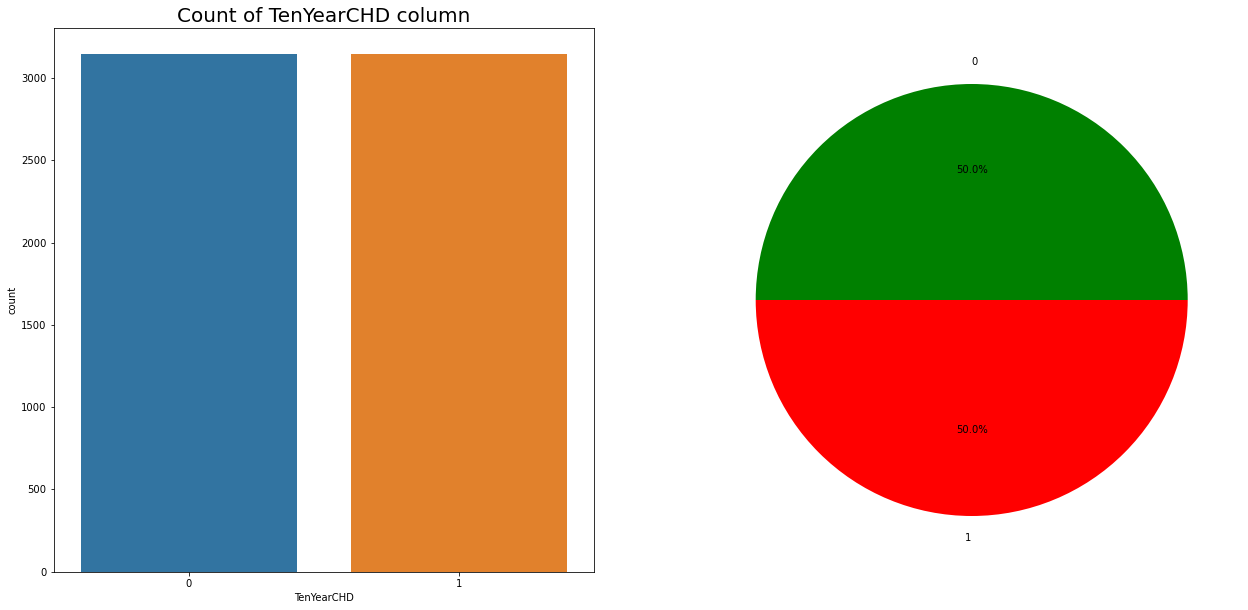

In [31]:
#Distribution of heart disease cases in the balanced dataset, the outcome variable
plt.figure(figsize=(12, 10), facecolor='w')
plt.subplots_adjust(right=1.5)
plt.subplot(121)
sns.countplot(x="TenYearCHD", data=df)
plt.title("Count of TenYearCHD column", size=20)
plt.subplot(122)
labels=[0,1]
plt.pie(df["TenYearCHD"].value_counts(),autopct="%1.1f%%",labels=labels,colors=["green","red"])
plt.show()

In [32]:
#To idenfify the features that have larger contribution towards the outcome variable, TenYearCHD
X=df.iloc[:,0:15] # independent variable
y=df.iloc[:,-1]   # dependant variable
print("X - ", X.shape, "\ny - ", y.shape)

X -  (6290, 15) 
y -  (6290,)


### Data Feature Selection

In [33]:
# Data Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [34]:
#Apply SelectKBest and extract top 10 features
best=SelectKBest(score_func=chi2, k=10)
fit=best.fit(X,y)
data_scores=pd.DataFrame(fit.scores_)
data_columns=pd.DataFrame(X.columns)

#Join the two dataframes
scores=pd.concat([data_columns,data_scores],axis=1)
scores.columns=['Feature','Score']
print(scores.nlargest(11,'Score'))

          Feature        Score
4      cigsPerDay  1169.022871
10          sysBP  1063.272115
1             age   827.537202
9         totChol   275.593383
11          diaBP   185.545924
7    prevalentHyp   158.441261
0            male    83.220317
12            BMI    26.002226
2       education    16.541415
14        glucose    12.805534
3   currentSmoker     7.460454


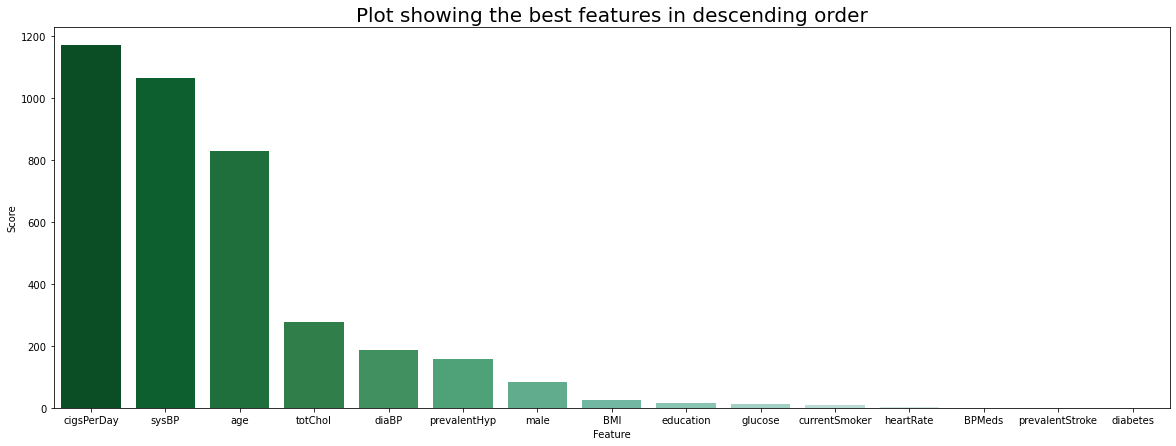

In [35]:
#To visualize feature selection
scores=scores.sort_values(by="Score", ascending=False)
plt.figure(figsize=(20,7), facecolor='w')
sns.barplot(x='Feature',y='Score',data=scores,palette='BuGn_r')
plt.title("Plot showing the best features in descending order", size=20)
plt.show()

In [36]:
#Select 10 features
features=scores["Feature"].tolist()[:10]
features

data=data[['sysBP','glucose','age','cigsPerDay','totChol','diaBP','prevalentHyp','male','BPMeds','diabetes','TenYearCHD']]
data.head()

,sysBP,glucose,age,cigsPerDay,totChol,diaBP,prevalentHyp,male,BPMeds,diabetes,TenYearCHD
0,106.0,77.0,39,0.0,195.0,70.0,0,1,0.0,0,0
1,121.0,76.0,46,0.0,250.0,81.0,0,0,0.0,0,0
2,127.5,70.0,48,20.0,245.0,80.0,0,1,0.0,0,0
3,150.0,103.0,61,30.0,225.0,95.0,1,0,0.0,0,1
4,130.0,85.0,46,23.0,285.0,84.0,0,0,0.0,0,0


### Splitting Data into Training and Test Set

In [37]:
X = df.drop("TenYearCHD",axis=1)
y = df["TenYearCHD"]
print(X.columns)
print(y)

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose'],
      dtype='object')
0       0
1       0
2       0
4       0
5       0
       ..
2063    1
962     1
2505    1
448     1
886     1
Name: TenYearCHD, Length: 6290, dtype: int64


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5032, 15)
(1258, 15)
(5032,)
(1258,)


In [39]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [40]:

def get_cross_val(model, X_train, y_train, X_valid, y_valid):
    
    # Fit on train, predict on validation
    clf = model
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_valid)
    
    # Cross validation score over 10 folds
    scores = cross_val_score(clf, X_train, y_train, cv=10)
    print("Cross validation over 10 folds: ", sum(scores)/10.0)
    
    return y_pred

### Model Training with Logistic Regression

confusion matrix


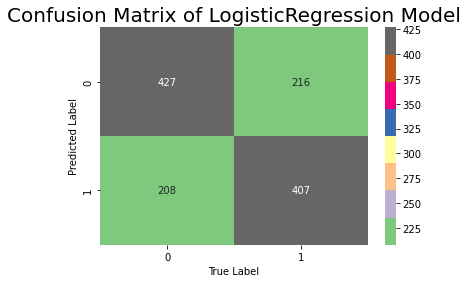



Accuracy of Logistic Regression: 66.29570747217805 

              precision    recall  f1-score   support

           0       0.67      0.66      0.67       643
           1       0.65      0.66      0.66       615

    accuracy                           0.66      1258
   macro avg       0.66      0.66      0.66      1258
weighted avg       0.66      0.66      0.66      1258

Cross validation over 10 folds:  0.6633693868534823


array([1, 1, 0, ..., 1, 0, 0], dtype=int64)

In [41]:
m1 = 'LogisticRegression'
lr = LogisticRegression(random_state=1, max_iter=1000)
lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print("confusion matrix")
sns.heatmap(lr_conf_matrix, annot=True,fmt="d",cmap=plt.cm.Accent)
plt.title('Confusion Matrix of '+m1+' Model', fontsize = 20)
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.show()
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))
get_cross_val(lr, X_train, y_train, X_test, y_test)

### Random Forests

confusion matrix


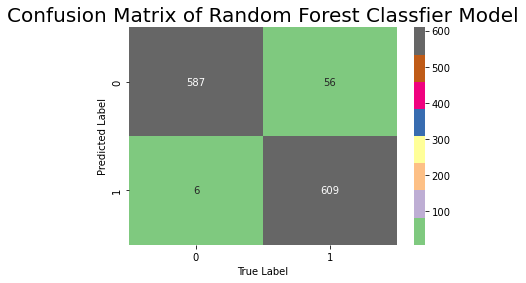



Accuracy of Random Forest: 95.07154213036566 

              precision    recall  f1-score   support

           0       0.99      0.91      0.95       643
           1       0.92      0.99      0.95       615

    accuracy                           0.95      1258
   macro avg       0.95      0.95      0.95      1258
weighted avg       0.95      0.95      0.95      1258

Cross validation over 10 folds:  0.9532980687304743


array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [42]:
from sklearn.ensemble import RandomForestClassifier
m2 = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=200, random_state=0,max_depth=12)
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("confusion matrix")
sns.heatmap(rf_conf_matrix, annot=True,fmt="d",cmap=plt.cm.Accent)
plt.title('Confusion Matrix of '+m2+' Model', fontsize = 20)
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.show()
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))
get_cross_val(rf, X_train, y_train, X_test, y_test)

### K Neighbors Classifier

confusion matrix


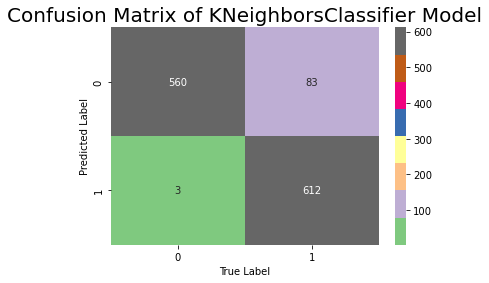



Accuracy of k-NN Classification: 93.1637519872814 

              precision    recall  f1-score   support

           0       0.99      0.87      0.93       643
           1       0.88      1.00      0.93       615

    accuracy                           0.93      1258
   macro avg       0.94      0.93      0.93      1258
weighted avg       0.94      0.93      0.93      1258

Cross validation over 10 folds:  0.9262693679194675


array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [43]:
from sklearn.neighbors import KNeighborsClassifier
m3 = 'KNeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=1)
model = knn.fit(X_train, y_train)
knn_predict = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predict)
knn_acc_score = accuracy_score(y_test, knn_predict)
print("confusion matrix")
sns.heatmap(knn_conf_matrix, annot=True,fmt="d",cmap=plt.cm.Accent)
plt.title('Confusion Matrix of '+m3+' Model', fontsize = 20)
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.show()
print("\n")
print("Accuracy of k-NN Classification:",knn_acc_score*100,'\n')
print(classification_report(y_test, knn_predict))
get_cross_val(knn, X_train, y_train, X_test, y_test)

### Gradient Boosting Classifier

confusion matrix


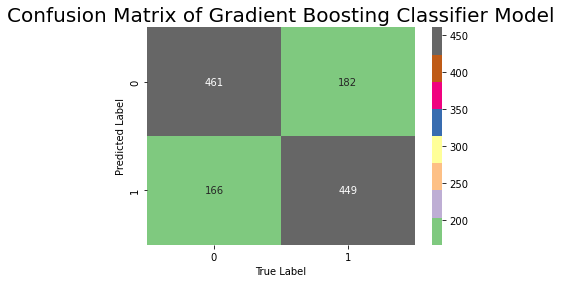



Accuracy of Gradient Boosting Classifier: 72.33704292527821 

              precision    recall  f1-score   support

           0       0.74      0.72      0.73       643
           1       0.71      0.73      0.72       615

    accuracy                           0.72      1258
   macro avg       0.72      0.72      0.72      1258
weighted avg       0.72      0.72      0.72      1258

Cross validation over 10 folds:  0.7368870112657389


array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [44]:
m4 = 'Gradient Boosting Classifier'
gb_clf =  GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)
gb_clf_predicted = gb_clf.predict(X_test)
gb_clf_conf_matrix = confusion_matrix(y_test, gb_clf_predicted)
gb_clf_acc_score = accuracy_score(y_test, gb_clf_predicted)
print("confusion matrix")
sns.heatmap(gb_clf_conf_matrix, annot=True,fmt="d",cmap=plt.cm.Accent)
plt.title('Confusion Matrix of '+m4+' Model', fontsize = 20)
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.show()
print("\n")
print("Accuracy of Gradient Boosting Classifier:",gb_clf_acc_score*100,'\n')
print(classification_report(y_test,gb_clf_predicted))
get_cross_val(gb_clf, X_train, y_train, X_test, y_test)

### DecisionTreeClassifier

confusion matrix


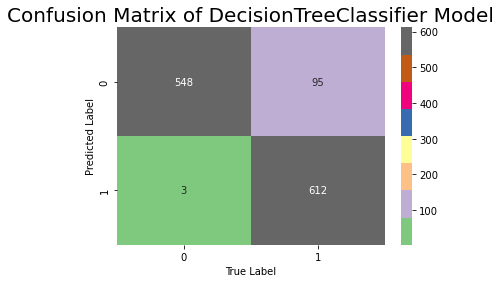



Accuracy of DecisionTreeClassifier: 92.20985691573927 

              precision    recall  f1-score   support

           0       0.99      0.85      0.92       643
           1       0.87      1.00      0.93       615

    accuracy                           0.92      1258
   macro avg       0.93      0.92      0.92      1258
weighted avg       0.93      0.92      0.92      1258

Cross validation over 10 folds:  0.9139504244375021


array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [45]:
m5 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 30)
dt.fit(X_train,y_train)
dt_predicted = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)
print("confusion matrix")
sns.heatmap(dt_conf_matrix, annot=True,fmt="d",cmap=plt.cm.Accent)
plt.title('Confusion Matrix of '+m5+' Model', fontsize = 20)
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.show()
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(y_test,dt_predicted))
get_cross_val(dt, X_train, y_train, X_test, y_test)

### Support Vector Classifier

confusion matrix


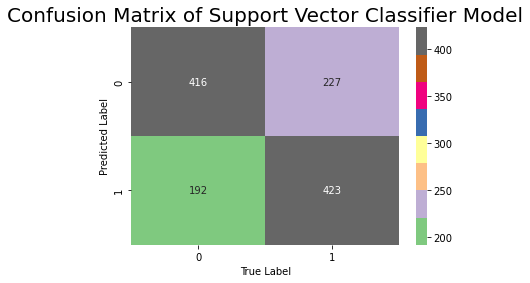



Support Vector Classifier: 66.69316375198729 

              precision    recall  f1-score   support

           0       0.68      0.65      0.67       643
           1       0.65      0.69      0.67       615

    accuracy                           0.67      1258
   macro avg       0.67      0.67      0.67      1258
weighted avg       0.67      0.67      0.67      1258

Cross validation over 10 folds:  0.6623757455268389


array([1, 1, 0, ..., 1, 0, 0], dtype=int64)

In [46]:
m6 = 'Support Vector Classifier'
svc = SVC(kernel = 'linear')
svc.fit(X_train,y_train)
svc_predicted = svc.predict(X_test)
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)
print("confusion matrix")
sns.heatmap(svc_conf_matrix, annot=True,fmt="d",cmap=plt.cm.Accent)
plt.title('Confusion Matrix of '+m6+' Model', fontsize = 20)
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.show()
print("\n")
print("Support Vector Classifier:",svc_acc_score*100,'\n')
print(classification_report(y_test,svc_predicted))
get_cross_val(svc, X_train, y_train, X_test, y_test)
# kernels = ['linear', 'poly', 'rbf', 'sigmoid']

### Naive Bayes Classifier

confusion matrix


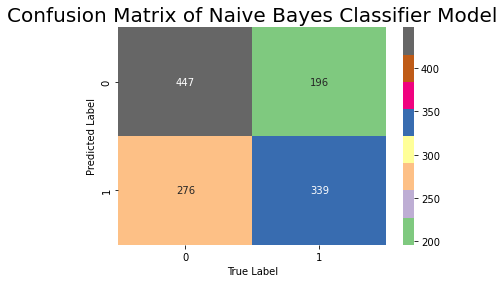



Naive Bayes Classifier: 62.48012718600954 

              precision    recall  f1-score   support

           0       0.62      0.70      0.65       643
           1       0.63      0.55      0.59       615

    accuracy                           0.62      1258
   macro avg       0.63      0.62      0.62      1258
weighted avg       0.63      0.62      0.62      1258

Cross validation over 10 folds:  0.6359383382246204


array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [47]:
m7 = 'Naive Bayes Classifier'
nbc = GaussianNB()
nbc.fit(X_train,y_train)
nbc_predicted = nbc.predict(X_test)
nbc_conf_matrix = confusion_matrix(y_test, nbc_predicted)
nbc_acc_score = accuracy_score(y_test, nbc_predicted)
print("confusion matrix")
sns.heatmap(nbc_conf_matrix, annot=True,fmt="d",cmap=plt.cm.Accent)
plt.title('Confusion Matrix of '+m7+' Model', fontsize = 20)
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.show()
print("\n")
print("Naive Bayes Classifier:",nbc_acc_score*100,'\n')
print(classification_report(y_test,nbc_predicted))
get_cross_val(nbc, X_train, y_train, X_test, y_test)

### ROc Curve to compare all the classifiers

In [48]:
lr_false_positive_rate,lr_true_positive_rate,lr_threshold = roc_curve(y_test,lr_predict)
knn_false_positive_rate,knn_true_positive_rate,knn_threshold = roc_curve(y_test,knn_predict)
rf_false_positive_rate,rf_true_positive_rate,rf_threshold = roc_curve(y_test,rf_predicted)                                                             
dt_false_positive_rate,dt_true_positive_rate,dt_threshold = roc_curve(y_test,dt_predicted)
gb_clf_false_positive_rate,gb_clf_true_positive_rate,gb_clf_threshold = roc_curve(y_test,gb_clf_predicted)
svc_false_positive_rate,svc_true_positive_rate,svc_threshold = roc_curve(y_test,svc_predicted)
nbc_false_positive_rate,nbc_true_positive_rate,nbc_threshold = roc_curve(y_test,nbc_predicted)

In [49]:
lr_false_positive_rate,lr_true_positive_rate,lr_threshold

(array([0.        , 0.33592535, 1.        ]),
 array([0.        , 0.66178862, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [50]:
lr_auc = round(auc(lr_false_positive_rate, lr_true_positive_rate), 3)
knn_auc = round(auc(knn_false_positive_rate, knn_true_positive_rate), 3)
rf_auc = round(auc(rf_false_positive_rate, rf_true_positive_rate), 3)
dt_auc = round(auc(dt_false_positive_rate, dt_true_positive_rate), 3)
gb_clf_auc = round(auc(gb_clf_false_positive_rate, gb_clf_true_positive_rate), 3)
svc_auc = round(auc(svc_false_positive_rate, svc_true_positive_rate), 3)
nbc_auc = round(auc(nbc_false_positive_rate, nbc_true_positive_rate), 3)

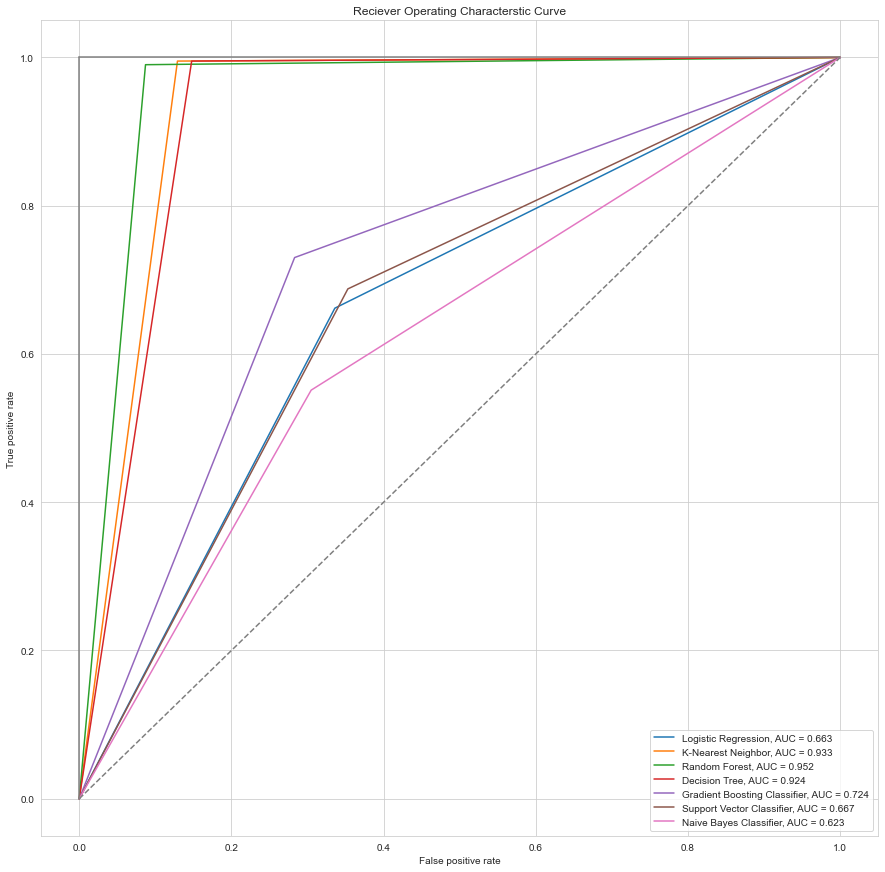

In [51]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,15), facecolor='w')
plt.title('Reciever Operating Characterstic Curve')
plt.plot(lr_false_positive_rate,lr_true_positive_rate,label='Logistic Regression, AUC = ' + str(lr_auc))
plt.plot(knn_false_positive_rate,knn_true_positive_rate,label='K-Nearest Neighbor, AUC = ' + str(knn_auc))
plt.plot(rf_false_positive_rate,rf_true_positive_rate,label='Random Forest, AUC = ' + str(rf_auc))
plt.plot(dt_false_positive_rate,dt_true_positive_rate,label='Decision Tree, AUC = ' + str(dt_auc))
plt.plot(gb_clf_false_positive_rate,gb_clf_true_positive_rate,label='Gradient Boosting Classifier, AUC = ' + str(gb_clf_auc))
plt.plot(svc_false_positive_rate,svc_true_positive_rate,label='Support Vector Classifier, AUC = ' + str(svc_auc))
plt.plot(nbc_false_positive_rate,nbc_true_positive_rate,label='Naive Bayes Classifier, AUC = ' + str(nbc_auc))
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

## Applying Linear Regression

In [52]:
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [53]:
lin_X = df[['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']]
lin_y = df['sysBP']

In [54]:
X_train_lin, X_test_lin, y_train_lin, y_test_lin = train_test_split(lin_X,lin_y, test_size=0.2, random_state=42)

In [55]:
from sklearn import datasets, linear_model, metrics
reg = linear_model.LinearRegression()
 
# train the model using the training sets
reg.fit(X_train_lin, y_train_lin)
 
# regression coefficients
print('Coefficients: ', reg.coef_)

Coefficients:  [-2.67750551e+00  4.19592801e-01 -1.02528221e+00 -1.61524034e+00
  9.53633729e-02  5.77315973e-15  4.44089210e-15  1.49314373e+01
  1.33226763e-15  1.11382312e-02  9.00254607e-01 -8.33476703e-02
 -1.21506581e-02  8.70432259e-02  1.82921722e+00]


### Linear Regression Model

In [56]:
m8 = 'Linear Regression'
lin_predicted = reg.predict(X_test_lin)
lin_acc_score = reg.score(X_train_lin, y_train_lin)
print("LinearRegression:",lin_acc_score*100,'\n')
get_cross_val(reg, X_train_lin, y_train_lin, X_test_lin, y_test_lin)

LinearRegression: 69.5646172180188 

Cross validation over 10 folds:  0.6932237506978094


array([161.7061621 , 154.4887248 , 111.85982054, ..., 139.78479012,
       147.065707  , 149.50830296])

In [57]:
from sklearn.decomposition import PCA

In [61]:
X.shape

(6290, 15)

In [58]:
pca = PCA(0.95) 
X_pca= pca.fit_transform(X)
X_pca.shape # here PCA helped me reduce my column from 15 to 5

(6290, 5)

In [59]:
X_pca

array([[-46.11045357, -23.73928852,  -4.54337542,  -0.52207312,
        -12.68432167],
       [ 11.4633604 , -11.86940184,   2.29799942,   2.54479968,
        -23.37507603],
       [  6.72169193,  -9.21328402,  12.39224048,  -2.64558606,
          3.87452588],
       ...,
       [ 25.6718162 ,  26.33874186,   5.46414051,   5.04522783,
          5.36507265],
       [-72.45714528, -16.14538564,  -8.03385247,  -2.13523635,
         12.17597632],
       [-35.28237467,  52.47643902, -14.4209728 ,  -6.57278646,
          6.52306076]])

In [60]:
pca.explained_variance_ratio_ #my first column is capturing 62% of variation or 62 of useful information from my dataset

array([0.6281186 , 0.17224688, 0.06119498, 0.05456597, 0.0413554 ])

In [62]:
pca.n_components_

5

In [63]:
X_train_pca ,X_test_pca, y_train, y_test = train_test_split(X_pca,y, test_size=0.2, random_state=30)

### Before applying PCA Accuracy of Logistic Regression: 0.66 .After Applying PCA Accuracy of Logistic Regression: 0.6120826709062003 .Its lower so lets try other models also.

In [64]:
model = LogisticRegression()
model.fit(X_train_pca, y_train)
model.score(X_test_pca, y_test)

0.6120826709062003

### Random forest was showing Higher accuracy earlier with 95 % after applying PCA it shows 97.

In [65]:

# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100) 
 
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train_pca, y_train)
 
# performing predictions on the test dataset
y_pred = clf.predict(X_test_pca)
 
# metrics are used to find accuracy or error
from sklearn import metrics 
print()
 
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))


ACCURACY OF THE MODEL:  0.9745627980922098


### With  Decision tree previously we got Accuracy of DecisionTreeClassifier: 92.20985691573927. After applying PCA my accuracy is Accuracy of DecisionTreeClassifier: 92.76629570747218 

confusion matrix


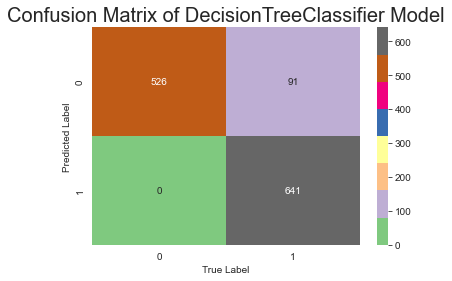



Accuracy of DecisionTreeClassifier: 92.76629570747218 

              precision    recall  f1-score   support

           0       1.00      0.85      0.92       617
           1       0.88      1.00      0.93       641

    accuracy                           0.93      1258
   macro avg       0.94      0.93      0.93      1258
weighted avg       0.94      0.93      0.93      1258

Cross validation over 10 folds:  0.9125591687967434


array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

In [66]:
clf3 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 30)
dt.fit(X_train_pca,y_train)
dt_predicted = dt.predict(X_test_pca)
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)
print("confusion matrix")
sns.heatmap(dt_conf_matrix, annot=True,fmt="d",cmap=plt.cm.Accent)
plt.title('Confusion Matrix of '+clf3+' Model', fontsize = 20)
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.show()
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(y_test,dt_predicted))
get_cross_val(dt, X_train_pca, y_train, X_test_pca, y_test)